# Better Data Science | Make Synthetic Datasets with Python

- Library imports
- `rcParams` is only here for plot stylings

In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

<br>

## Make a synthetic dataset
- 1000 data points measured through 2 features
- Perfect (50:50) class distribution
- Binary target variable, every subset has a single cluster
- Make sure to use `random_state=42` if you want reproducible results

In [2]:
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df.columns = ['x1', 'x2', 'y']
# 5 random rows
df.sample(5)

,x1,x2,y
489,0.458509,-1.004388,0
887,1.557469,0.816861,1
897,1.564724,-0.585663,0
620,0.079709,1.936079,1
307,0.063452,-1.647966,0


<br>

## Visualization
- The `plot()` function visualizes a synthetic dataset:

In [3]:
def plot(df: pd.DataFrame, x1: str, x2: str, y: str, title: str = '', save: bool = False, figname='figure.png'):
    plt.figure(figsize=(14, 7))
    plt.scatter(x=df[df[y] == 0][x1], y=df[df[y] == 0][x2], label='y = 0')
    plt.scatter(x=df[df[y] == 1][x1], y=df[df[y] == 1][x2], label='y = 1')
    plt.title(title, fontsize=20)
    plt.legend()
    if save:
        plt.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()

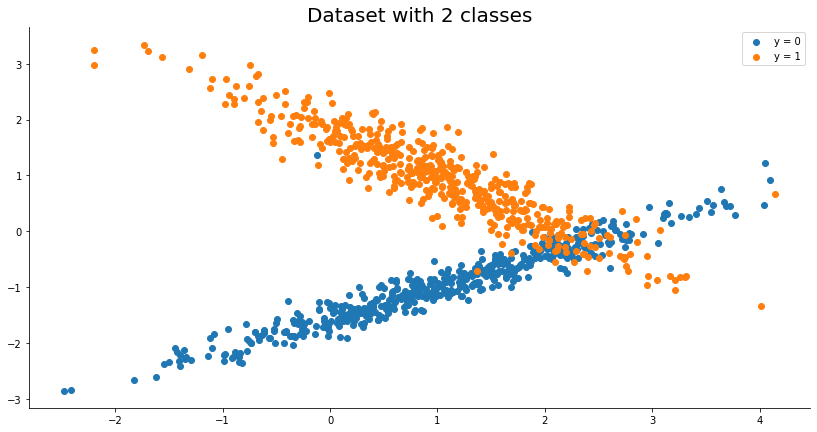

In [4]:
plot(df=df, x1='x1', x2='x2', y='y', title='Dataset with 2 classes')

<br>

## Adding noise
- You can use the `flip_y` parameter to add noise 
- From the docs:
    - *The fraction of samples whose class is assigned randomly. Larger
    values introduce noise in the labels and make the classification
    task harder. Note that the default setting flip_y > 0 might lead
    to less than n_classes in y in some cases.*

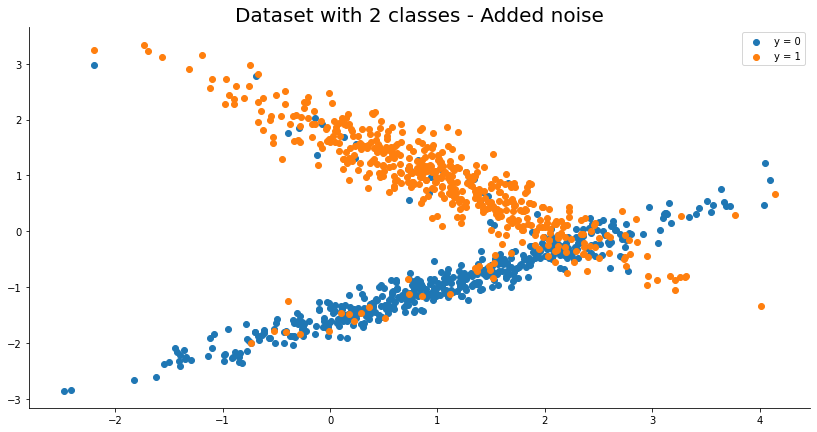

In [5]:
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.15,
    random_state=42
)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df.columns = ['x1', 'x2', 'y']

plot(df=df, x1='x1', x2='x2', y='y', title='Dataset with 2 classes - Added noise')

<br>

## Add class imbalance
- Perfect class distribution (50:50) is rarely the case
- You can use the `weights` parameter to play with the distribution
    - Assigning the value of 0.95 makes the `y = 1` class take 5% of the data

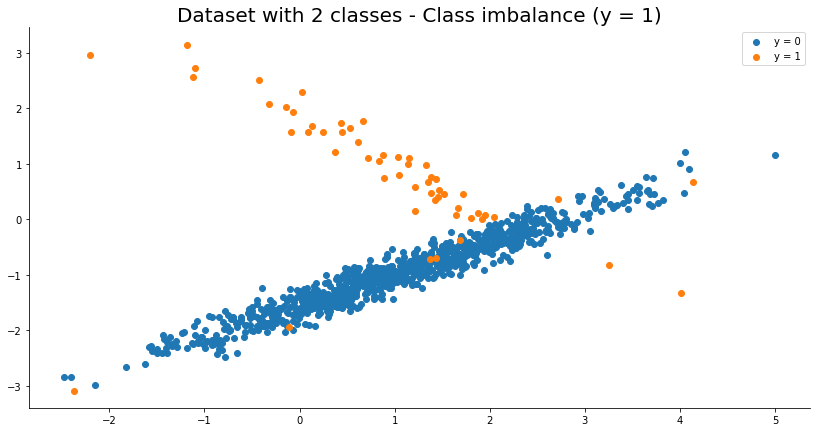

In [6]:
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.95],
    random_state=42
)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df.columns = ['x1', 'x2', 'y']

plot(df=df, x1='x1', x2='x2', y='y', title='Dataset with 2 classes - Class imbalance (y = 1)')

- You can do the opposite:

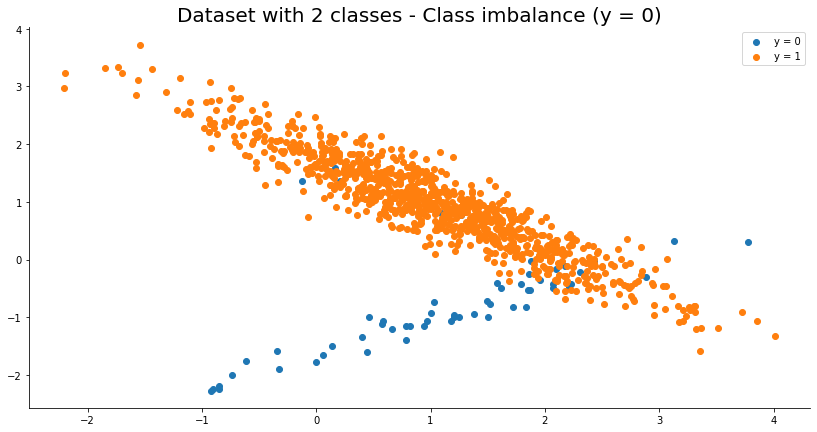

In [7]:
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.05],
    random_state=42
)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df.columns = ['x1', 'x2', 'y']

plot(df=df, x1='x1', x2='x2', y='y', title='Dataset with 2 classes - Class imbalance (y = 0)')

<br>

## Make classification task easier/harder
- You can play around with the `class_sep` parameter to adjust class separation
- Higher the value, the more separated the classes are

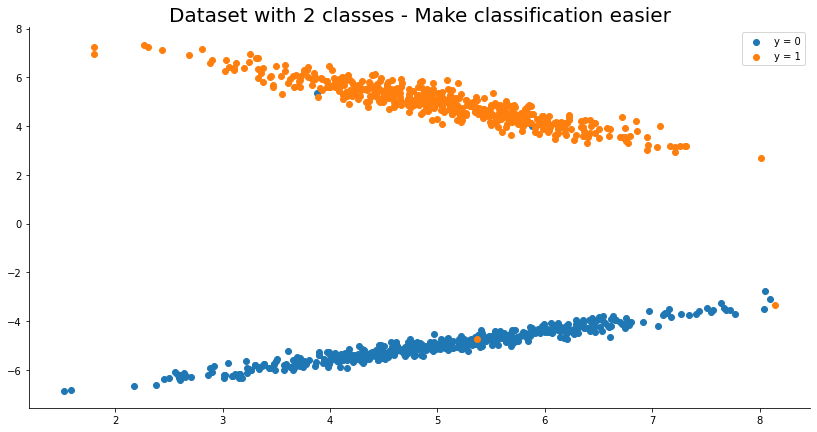

In [8]:
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=5,
    random_state=42
)

df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
df.columns = ['x1', 'x2', 'y']

plot(df=df, x1='x1', x2='x2', y='y', title='Dataset with 2 classes - Make classification easier')